PAN CARD detection

The purpose of the project is to find out the tampering of the project using Computer Vision. To check the Pan card is original or not.

In [ ]:
#Importing the libs

from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
# Open image and display
Original=Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream=True).raw)
tampered=Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

In [ ]:
#The file format of source file.
print("Original image format: ",Original.format)
print("Tampered image format: ",tampered.format)

#Image size in pixels
print("Original image size: ",Original.size)
print("Tampered image size: ",tampered.size)


Original image format:  JPEG
Tampered image format:  PNG
Original image size:  (1200, 800)
Tampered image size:  (282, 179)


In [ ]:
# Resize the image

original=Original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered=tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')


(250, 160)
(250, 160)


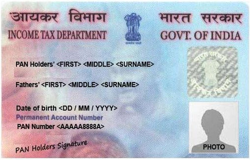

In [ ]:
original

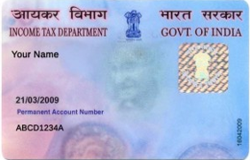

In [ ]:
tampered

# Comparing the original Pan to tampered pan using cv2 function.

In [ ]:
# Load the 2 input images
original=cv2.imread('pan_card_tampering/image/original.png')
tampered=cv2.imread('pan_card_tampering/image/tampered.png')

In [ ]:
#Converting images to Greyscale
original=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

error: ignored

Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score,diff)=structural_similarity(original,tampered,full=True)
diff=(diff*255).astype("uint8")
print(f"SSIM : {score}") # We can say that the image is 31% similar to each other based on the score which is less.

SSIM : 0.31686135690489126


Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [ ]:
# Calculating the threshold and contours
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)

Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [ ]:
#loop over the contours
for c in cnts:
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original format image


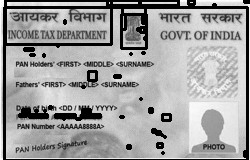

In [ ]:
print('Original format image')
Image.fromarray(original)

Tampered Image


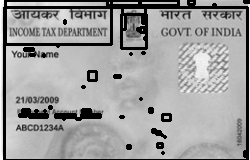

In [ ]:
print("Tampered Image")
Image.fromarray(tampered)

Difference image


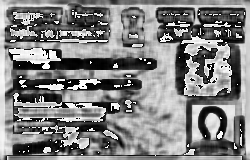

In [ ]:
#Display difference image with black
print("Difference image")
Image.fromarray(diff) #The black portions determine that there is difference between the original and tampered images.

Threshold Image


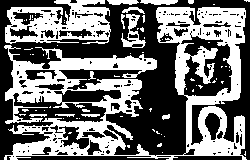

In [ ]:
#To find the threshold with white
print('Threshold Image')
Image.fromarray(thresh) #Images are different as we have more white spaces.

Summary

Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.

As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.

Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.

Scope

This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.